- ch06이 학습 관련 기술들 인데, 
    - 매개변수 갱신
    - 가중치의 초깃값
    - 배치 정규화
    - 바른 학습을 위해
    - 적절한 파라미터 값 찾기
    
있는데, 그중 **매개변수 갱신**부분만 함, 나머지 차후에 참고하자!!

# 매개변수(Weight) 갱신
### 신경망 학습
    - 손실 함수의 값을 가능한 한 낮추는 매개변수 찾기
    - 매개변수의 최적값을 찾는 최적화(optimization) 문제
    - 매우 어려운 작업
        - 매개변수 공간이 넓고 복잡하므로
    - 단서
        - 기울기(미분, Gradient)
    - SGD (Stochastic Gradient Descent)
        - 기울기를 단서로 기울어진 방향으로 매개변수 값을 갱신하는 잎을 여러 번 반복하여 점점 최적값에 다가가는 방법

### 확률적 경사 하강법(SGD)


$
\begin{equation*}
W <- W - n \cdot \frac{\partial L}{\partial W}
\end{equation*}
$

In [ ]:
Class SGD: 
    def __init__(self, lr=0.01): 
        self.lr = lr 
    def update(self, params, grads): 
        for key in params.keys(): 
            params[key] -= self.lr * grads[key]

- 확률적 경사 하강법(SGD)
    - 매개변수 갱신용 의사 코드

### SGD의 단점
    - 문제에 따라 비효율
    - (손실) 함수가 비등방성(anisotropy)인 경우
        - 축에 따른 기울기가 다른 경우

<img src="picture/SGD 단점.png" />

- SGD에 의한 최적화 갱신 경로

<img src="picture/SGD 단점2.png" />

### 모멘텀(Momentum), 

$v <- \alpha \cdot v - n \cdot \frac{\delta L}{\delta W} $    
- y축쪽 큰 기울기 
- x축쪽 작은 기울기 로 반영되네

$W <- W + v$   // v: 속도

$\alpha \cdot v$는 default 값이다. 기본 이동거리!! 

- 기울기가 0이 되어도 $\alpha \cdot v$ 만큼의 속도로 가중치 매개변수(Weight) 공간을 이동

<img src="picture/momentum.png" />

- common/optimizer.py

- 모멘텀에 의한 최적화 갱신 경로
<img src="picture/momentum2.PNG" />

### AdaGrade
- 학습률 감소 (Learning rate decay) 기법
    - 학습을 진행하면서 학습률을 점차 줄여가는 방법
    
- 개별 매개변수에 적응적으로 학습률을 조정하면서 학습을 진행하는 알고리즘
    - **개별 매개변수에 적합한 '맞춤형' 학습률을 제공**
    
<img src="picture/AdaGrad.png" />

### AdaGrad
- AdaGrade에 의한 최적화 갱신 경로
<img src="picture/AdaGrad_graph.png" />

### Adam
- 모멘텀과 AdaGrad의 장점을 융합
- 2015년에 제안된 새로운 방법
- Adam에 의한 최적화 갱신 경로
<img src="picture/Adam_graph.PNG" />

- 어떤 갱신 방법을 이용할 것인가?
<img src="picture/total_graph.PNG" />

- 문제에 따라서 다르지만, Adam이 가장 최신 가장 많이 사용된다.
- 이런 기존의 메커니즘을 공부하는 이유는, 차후 자신이 더 좋게 수정해서 사용할 수 있기 때문에 개념,원리를 보는 것이다. 그냥 가져다 쓰는 것이 아니고!!!

### MNIST 데이터셋으로 본 갱신 방법 비교
- ch06/optimizer_compare_mnist

<img src="picture/mnist_optimizer.png" />

### 코드

In [ ]:
class AdaGrad:

    """AdaGrad"""

    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

- AdaGrade 변형 RMSprop 이다!! 
- h를 구하는 공식이 다르다! 

In [4]:

class RMSprop:

    """RMSprop"""

    def __init__(self, lr=0.01, decay_rate = 0.99):
        self.lr = lr
        self.decay_rate = decay_rate
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] *= self.decay_rate
            self.h[key] += (1 - self.decay_rate) * grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

In [ ]:
class Adam:

    """Adam (http://arxiv.org/abs/1412.6980v8)"""

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        # learning rate 별도로 계산함!! 
        
        
        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)
            
            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)

In [5]:
pwd

'C:\\pydev\\Machine_Learning\\MLiA_py3\\DeepLearning'

In [6]:
%cd origin/ch06

C:\pydev\Machine_Learning\MLiA_py3\DeepLearning\origin\ch06


In [7]:
pwd

'C:\\pydev\\Machine_Learning\\MLiA_py3\\DeepLearning\\origin\\ch06'

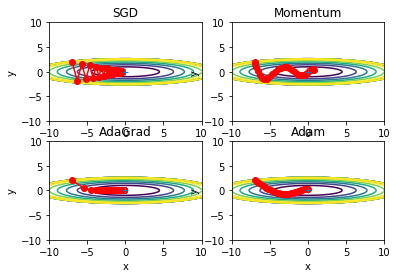

In [8]:
import optimizer_compare_naive

===========iteration:0===========
SGD:2.37073162763
Momentum:2.37435576448
AdaGrad:1.88505609232
Adam:2.18713394832
===========iteration:100===========
SGD:1.61039164106
Momentum:0.455163397192
AdaGrad:0.212356118393
Adam:0.376422417695
===========iteration:200===========
SGD:0.870108317656
Momentum:0.258378456024
AdaGrad:0.133647809161
Adam:0.201505380578
===========iteration:300===========
SGD:0.40644831892
Momentum:0.0995532412495
AdaGrad:0.0379206198396
Adam:0.0618321108971
===========iteration:400===========
SGD:0.424574637509
Momentum:0.0951679995848
AdaGrad:0.0405533651693
Adam:0.0592432721184
===========iteration:500===========
SGD:0.361696214567
Momentum:0.22632515579
AdaGrad:0.12867726509
Adam:0.198257813324
===========iteration:600===========
SGD:0.33365729824
Momentum:0.151195710041
AdaGrad:0.0472658197589
Adam:0.131313058951
===========iteration:700===========
SGD:0.302875044205
Momentum:0.128307987241
AdaGrad:0.069232434089
Adam:0.0842407359301
===========iteration:800===

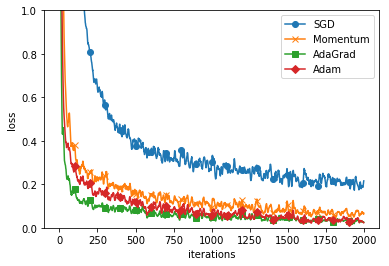

In [9]:
import optimizer_compare_mnist